# MACHINE LEARNING PARA FINANZAS (1FIN44-0921)
# Examen Final


````
Indicaciones:

1) Desarrollar y ejecutar todo el código en Colab.

2) Responder en las casillas correspondiente, en las que se indica: ******************* código *************************

3) Ejecute el código completo y verifique que funciona antes de remitirlo.

4) Renombrar el archivo como Examen_Final_PrimerApellido_PrimerNombre:
Ejemplo: Examen_Final_Ariza_Carmen

````



# Descripción del Problema

El objetivo del problema es construir un modelo que pueda clasificar correctamente si el ingreso de una persona excede los $50,000 anuales a partir de las características proporcionadas.



# Diccionario de Datos

````
* target

Descripción: ingresos anuales de una persona expresados en dos categorías
Tipo de variable: categórica
Categorías: >50K salarios mayores a 50,000 dólares al año; <=50K salarios menores iguales a 50,000 dólares al año

* variables explicativas

1) age

Descripción: edad
Tipo de variable: contínua

2) workclass

Descripción: categoría de empleo
Tipo de variable: categórica
Categorías: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3) education

Descripción: nivel educativo
Tipo de variable: categórica
Categorías: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

4) education-num

Descripción: número de años de educación formal
Tipo de variable: contínua

5) occupation

Descripción: ocupación laboral
Tipo de variable: categórica
Categorías: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

6) hours-per-week

Descripción: horas de trabajo por semana
Tipo de variable: contínua

````

# Importación de librerías

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y Modelado de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression  # Para regresión logística
from sklearn.svm import SVC                          # Para máquinas de soporte vectorial (SVM)
from sklearn.ensemble import RandomForestClassifier  # Para random forest
from sklearn.ensemble import GradientBoostingClassifier  # Para gradient boosting
from sklearn.neighbors import KNeighborsClassifier   # Para k-nearest neighbors (KNN)
from sklearn.naive_bayes import GaussianNB           # Para Naive Bayes
from sklearn.tree import DecisionTreeClassifier      # Para árboles de decisión
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Cargar datos

In [73]:
data = pd.read_excel('data.xlsx')

# Análisis de valores nulos

In [74]:
print("Valores nulos en cada columna:\n", data.isnull().sum())

Valores nulos en cada columna:
 age               0
workclass         0
education         0
education-num     0
occupation        0
hours-per-week    0
target            0
dtype: int64


In [75]:
data.head()

,age,workclass,education,education-num,occupation,hours-per-week,target
0,39,State-gov,Bachelors,13,Adm-clerical,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,40,<=50K


# Preprocesamiento
# Codificación de variables categóricas

In [76]:
# Identificación de columnas categóricas
categorical_features = data.select_dtypes(include=['object']).columns

# Inicialización y aplicación de LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_features}
for col, le in label_encoders.items():
    data[col] = le.fit_transform(data[col])

# Creación de un DataFrame para mostrar las equivalencias
equivalences = {col: dict(zip(le.classes_, le.transform(le.classes_))) for col, le in label_encoders.items()}
equivalences_df = pd.DataFrame(equivalences)

# Mostrar la equivalencia
print(equivalences_df)

                    workclass  education  occupation  target
 ?                        0.0        NaN         0.0     NaN
 Federal-gov              1.0        NaN         NaN     NaN
 Local-gov                2.0        NaN         NaN     NaN
 Never-worked             3.0        NaN         NaN     NaN
 Private                  4.0        NaN         NaN     NaN
 Self-emp-inc             5.0        NaN         NaN     NaN
 Self-emp-not-inc         6.0        NaN         NaN     NaN
 State-gov                7.0        NaN         NaN     NaN
 Without-pay              8.0        NaN         NaN     NaN
 10th                     NaN        0.0         NaN     NaN
 11th                     NaN        1.0         NaN     NaN
 12th                     NaN        2.0         NaN     NaN
 1st-4th                  NaN        3.0         NaN     NaN
 5th-6th                  NaN        4.0         NaN     NaN
 7th-8th                  NaN        5.0         NaN     NaN
 9th                    

In [77]:
data.head()

,age,workclass,education,education-num,occupation,hours-per-week,target
0,39,7,9,13,1,40,0
1,50,6,9,13,4,13,0
2,38,4,11,9,6,40,0
3,53,4,1,7,6,40,0
4,28,4,9,13,10,40,0


In [78]:
# Mostrar el análisis descriptivo transpuesto
print("Análisis Descriptivo Transpuesto:\n", data.describe().T)

Análisis Descriptivo Transpuesto:
                   count       mean        std   min   25%   50%   75%   max
age             32561.0  38.581647  13.640433  17.0  28.0  37.0  48.0  90.0
workclass       32561.0   3.868892   1.455960   0.0   4.0   4.0   4.0   8.0
education       32561.0  10.298210   3.870264   0.0   9.0  11.0  12.0  15.0
education-num   32561.0  10.080679   2.572720   1.0   9.0  10.0  12.0  16.0
occupation      32561.0   6.572740   4.228857   0.0   3.0   7.0  10.0  14.0
hours-per-week  32561.0  40.437456  12.347429   1.0  40.0  40.0  45.0  99.0
target          32561.0   0.240810   0.427581   0.0   0.0   0.0   0.0   1.0


# Exploratory Data Analysis (EDA)

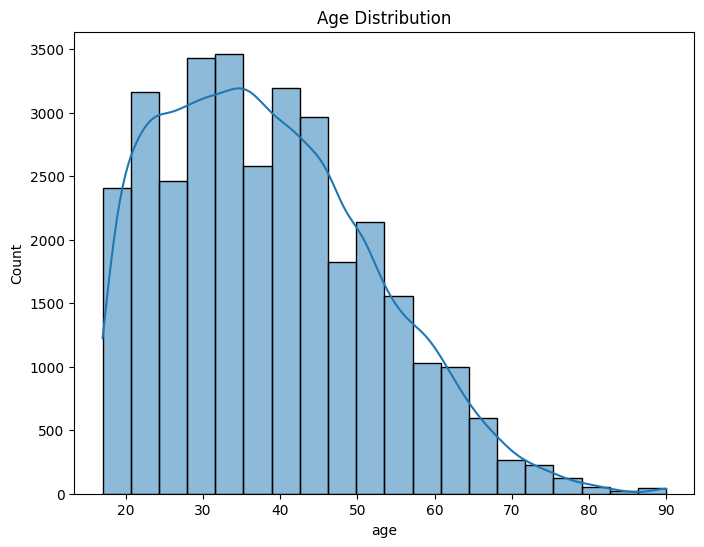

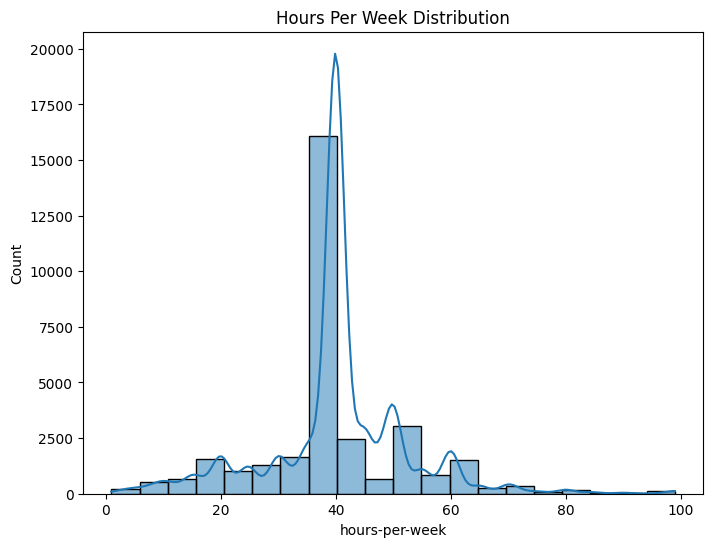

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['hours-per-week'], bins=20, kde=True)
plt.title('Hours Per Week Distribution')
plt.show()

# Análisis de correlaciones

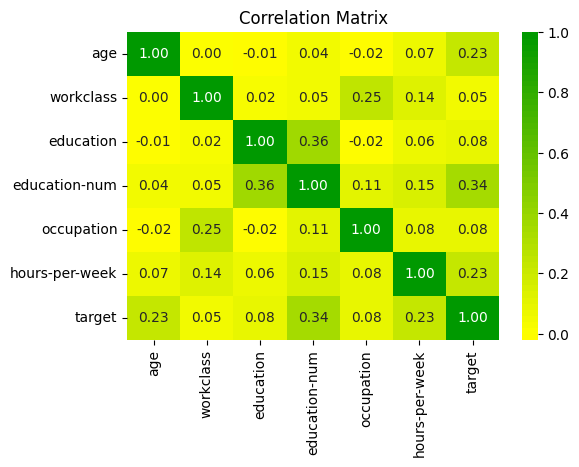

In [80]:
from matplotlib.colors import LinearSegmentedColormap

# Crear una paleta personalizada: rojo -> amarillo -> verde
colors = [(0.8, 0, 0), (1, 1, 0), (0, 0.6, 0)]  # Rojo, Amarillo, Verde
n_bins = 100  # Discretización para suavizar los colores
cmap_name = 'custom_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(6, 4))
sns.heatmap(data.corr().round(2), annot=True, cmap=cm, center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pregunta 1: Dividir datos en conjunto de entrenamiento y prueba

In [81]:
# Definir explicativas y target
X = data.drop('target', axis=1 )
y = data['target']

In [82]:
# Mantener los siguientes nombres de las submuestras sin escalar:
# X_unscaled_train, X_unscaled_test, y_train, y_test


In [83]:
############### código #####################
X_unscaled_train, X_unscaled_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_unscaled_train.shape)
print("Testing set shape:", X_unscaled_test.shape)
print("Training:", y_train.shape)
print("Testing set:", y_test.shape)

Training set shape: (26048, 6)
Testing set shape: (6513, 6)
Training: (26048,)
Testing set: (6513,)


# Pregunta 2: Estandarización

In [84]:
############### código #####################
scaler = StandardScaler()

X_train = scaler.fit_transform(X_unscaled_train)

X_test = scaler.transform(X_unscaled_test)

# Pregunta 3: Desarrollo de modelos : ¡Entrenamiento y Predicción!

````
¡Importante!
Recuerde cuáles son los argumentos de la curva roc:
# Calcular las tasas de verdaderos positivos y falsos positivos
        fpr, tpr, _ = roc_curve(y_test, y_prob)
# Ejemplo de y_test
y_test = [0, 1, 0, 1, 1, 0, 0, 1]
# Ejemplo de y_prob
y_prob = [0.3, 0.7, 0.2, 0.8, 0.9, 0.4, 0.1, 0.85]
````

````
 ¡Importante!:
Se ha defindo una función para imprimir la matriz de confusión y las curvas ROC por si las quiere utilizar
````

````
 ¡Importante!:

 Para etiquetar la clase predicha y la probabilidad generadas a partir de cada algoritmo emplee el sufijo asociado al algoritmo y de preferencia dos decimales como máximo

 Ejemplo:
    'Predicted Class': y_pred_log
    'Predicted Probability': np.round(y_prob_log,2)

    'Predicted Class': y_pred_rf
    'Predicted Probability': np.round(y_prob_rf,2)

  ````

In [85]:
# Función para imprimir la matriz de confusión con etiquetas


def print_confusion_matrix_with_labels(cm, labels):
    """
    Esta función imprime una matriz de confusión con etiquetas y calcula métricas adicionales.

    Parámetros:
    cm (array-like): Matriz de confusión.
    labels (list): Lista de etiquetas para las clases.

    """
    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(8, 6))
    # Mostrar la matriz de confusión con un mapa de colores
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    # Añadir etiquetas de texto en cada celda de la matriz
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    # Añadir etiquetas a los ejes
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels)
    # Mostrar la gráfica
    plt.show()

    # Calcular e imprimir métricas adicionales
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / float(tp + tn + fp + fn)
    precision = tp / float(tp + fp)
    recall = tp / float(tp + fn)
    f1 = 2 * precision * recall / (precision + recall)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


In [86]:
# Función para plotear las curvas ROC
def plot_roc_curves(models, X_test, y_test):
    """
    Esta función plotea las curvas ROC para múltiples modelos.

    Parámetros:
    models (list of tuples): Lista de modelos donde cada elemento es una tupla (nombre, modelo).
    X_test (array-like): Conjunto de características de prueba.
    y_test (array-like): Etiquetas verdaderas para el conjunto de prueba.

    """
    # Crear una figura para la gráfica ROC
    plt.figure(figsize=(10, 8))
    # Iterar sobre los modelos
    for name, model in models:
        # Obtener las probabilidades predichas
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "predict"):
            y_prob = model.predict(X_test).flatten()
        else:
            y_prob = model.decision_function(X_test)
        # Calcular las tasas de verdaderos positivos y falsos positivos
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        # Plotear la curva ROC
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
    # Añadir una línea diagonal
    plt.plot([0, 1], [0, 1], 'k--')
    # Configurar los límites de los ejes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    # Etiquetas de los ejes
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    # Añadir leyenda
    plt.legend(loc="lower right")
    # Mostrar la gráfica
    plt.show()

## Pregunta 3.1: Algoritmo 1: Regresión Logística


In [87]:
# Logistic Regression
# Denomine a su algoritmo: log
log = LogisticRegression()
log.fit(X_train, y_train)

# Realizar predicciones
y_pred_log = log.predict(X_test)  # Predicciones de clase
y_prob_log = log.predict_proba(X_test)[:, 1]  #

In [88]:
# Crear una tabla con clase real, clase estimada, clase predicha y probabilidades
# Si emplea la siguiente nomenclatura en el paso anterior se imprimirá la siguiente tabla.
log_results = pd.DataFrame({
    'Real Class': y_test,
    'Predicted Class': y_pred_log,
    'Predicted Probability': np.round(y_prob_log, 2) # round: redondeo a 2 decimales
})

# Imprimir la tabla
log_results.head()

,Real Class,Predicted Class,Predicted Probability
14160,0,0,0.10
27048,0,0,0.17
28868,1,0,0.40
5667,0,0,0.28
7827,0,0,0.17


## Pregunta 3.2: Algoritmo 2: Random Forest

In [89]:
# Random Forest
# Denomine a su algoritmo: rf
# Hiperparámetros: n_estimators=100, max_depth=5, random_state=42
# Para este ejercicio no técnicas de optimización de hiperparámetros ni de validación cruzada

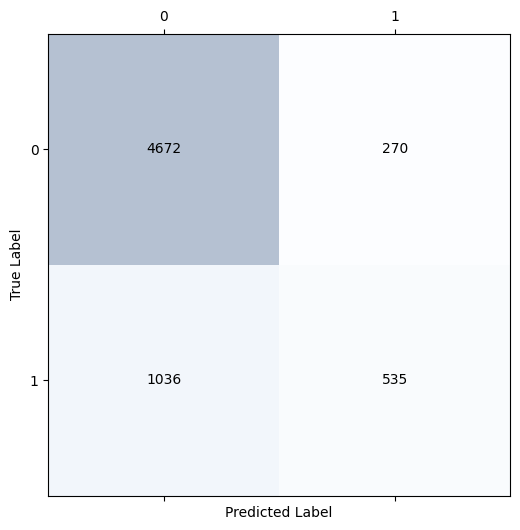

Accuracy: 0.80
Precision: 0.66
Recall: 0.34
F1 Score: 0.45


In [90]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred_rf)
print_confusion_matrix_with_labels(cm_rf, labels=[0, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


In [91]:
rf_results = pd.DataFrame({
    'Real Class': y_test,
    'Predicted Class': y_pred_rf,
    'Predicted Probability': np.round(y_prob_rf, 2) # round: redondeo a 2 decimales
})

# Imprimir la tabla
rf_results.head()

,Real Class,Predicted Class,Predicted Probability
14160,0,0,0.08
27048,0,0,0.23
28868,1,0,0.45
5667,0,0,0.30
7827,0,0,0.17


## Pregunta 3.3: Algoritmo 3: ¿?

In [92]:
# Hiperparámetros: kernel='linear', C=1.0, probability=True

In [93]:
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

# Asumiendo que X_train y y_train ya están definidos y que los datos están preprocesados
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_svm = svm.predict(X_test)  # Predicciones de clase
y_prob_svm = svm.predict_proba(X_test)[:, 1]

In [94]:
svm_results = pd.DataFrame({
    'Real Class': y_test,
    'Predicted Class': y_pred_svm,
    'Predicted Probability': np.round(y_prob_svm, 2) # round: redondeo a 2 decimales
})

# Imprimir la tabla
svm_results.head()

,Real Class,Predicted Class,Predicted Probability
14160,0,0,0.12
27048,0,0,0.17
28868,1,0,0.42
5667,0,0,0.30
7827,0,0,0.20


## Pregunta 3.4: Algoritmo 4: ¿?

In [95]:
# Emplee la siguiente arquitectura:

In [96]:
############### código #####################
ann = Sequential()
ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.001)
ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

ann.summary()

Epoch 1/50
814/814 [==============================] - 4s 3ms/step - loss: 0.4442 - accuracy: 0.7893 - val_loss: 0.4183 - val_accuracy: 0.8025
Epoch 2/50
814/814 [==============================] - 2s 2ms/step - loss: 0.4300 - accuracy: 0.8001 - val_loss: 0.4160 - val_accuracy: 0.8012
Epoch 3/50
814/814 [==============================] - 2s 2ms/step - loss: 0.4279 - accuracy: 0.7985 - val_loss: 0.4170 - val_accuracy: 0.8022
Epoch 4/50
814/814 [==============================] - 2s 2ms/step - loss: 0.4240 - accuracy: 0.8008 - val_loss: 0.4161 - val_accuracy: 0.8013
Epoch 5/50
814/814 [==============================] - 2s 2ms/step - loss: 0.4233 - accuracy: 0.7999 - val_loss: 0.4131 - val_accuracy: 0.8035
Epoch 6/50
814/814 [==============================] - 2s 2ms/step - loss: 0.4217 - accuracy: 0.8010 - val_loss: 0.4121 - val_accuracy: 0.8019
Epoch 7/50
814/814 [==============================] - 3s 3ms/step - loss: 0.4195 - accuracy: 0.8020 - val_loss: 0.4114 - val_accuracy: 0.8001
Epoch 

In [97]:
# Hiperparámetros y parámetros de configuración:

# optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy']
# epochs=50, batch_size=32
# validation_data=(X_test, y_test)
# verbose=1
# umbral=0.5

In [109]:
# predicciones
# Predicciones de clases
y_pred_ann = (ann.predict(X_test) >= 0.5).astype("int32")

# Probabilidades de la clase positiva
y_prob_ann = ann.predict(X_test)

204/204 [==============================] - 1s 2ms/step


# Pregunta 4: Evaluación de modelos: Curva ROC, AUC y matriz de confusión

In [99]:
 # Presentación de las gráficas y tablas:
   # Curvas roc y métricas AUC en una misma gráfica
   # Matrices de confusión con etiquetas True Label, Predicted Label, Class 0 y Class 1
 # Imprimir también las métricas Accuracy, Precision, Recall, F1 Score

In [100]:
############### código #####################

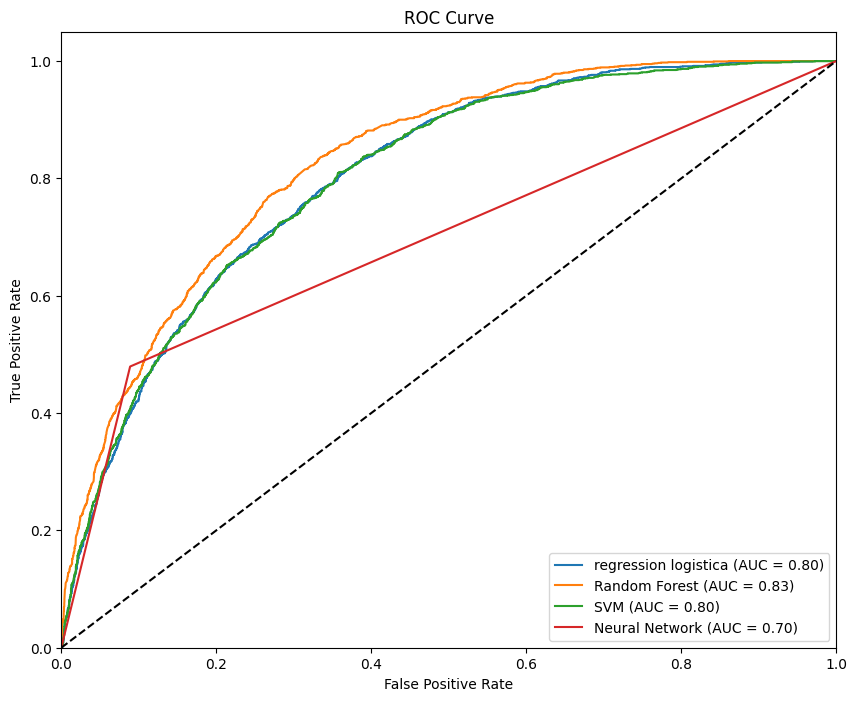


Metrics for regression logistica
Accuracy: 0.79
Precision: 0.62
Recall: 0.32
F1 Score: 0.42


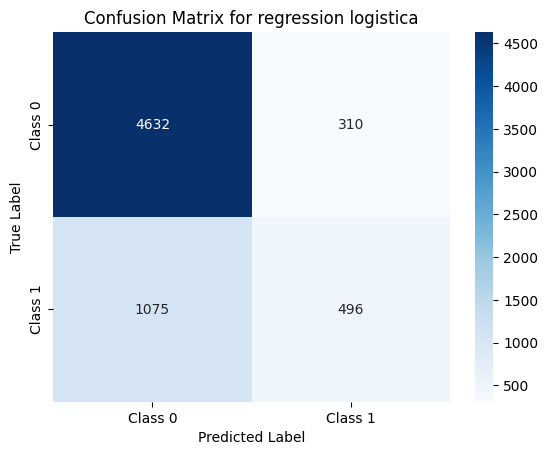


Metrics for Random Forest
Accuracy: 0.80
Precision: 0.66
Recall: 0.34
F1 Score: 0.45


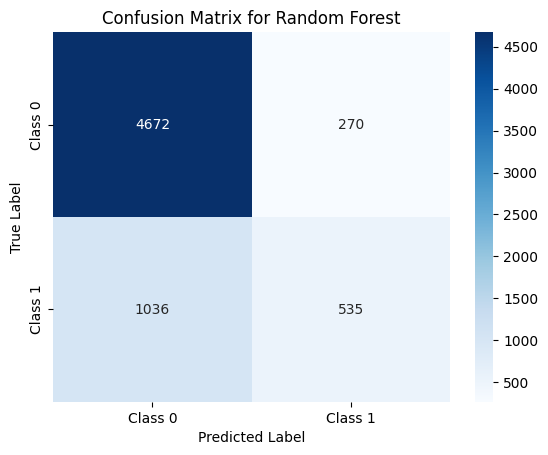


Metrics for SVM
Accuracy: 0.78
Precision: 0.70
Recall: 0.12
F1 Score: 0.21


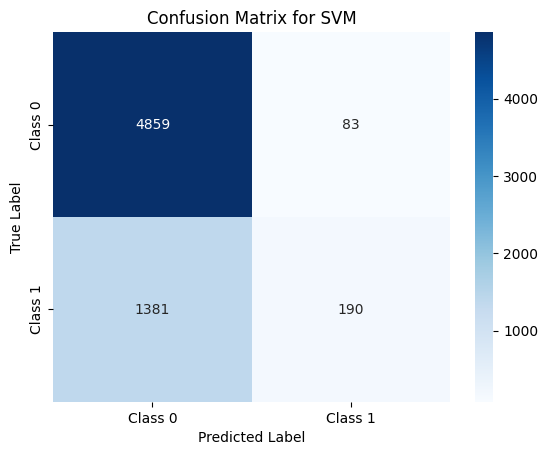


Metrics for Neural Network
Accuracy: 0.81
Precision: 0.63
Recall: 0.48
F1 Score: 0.55


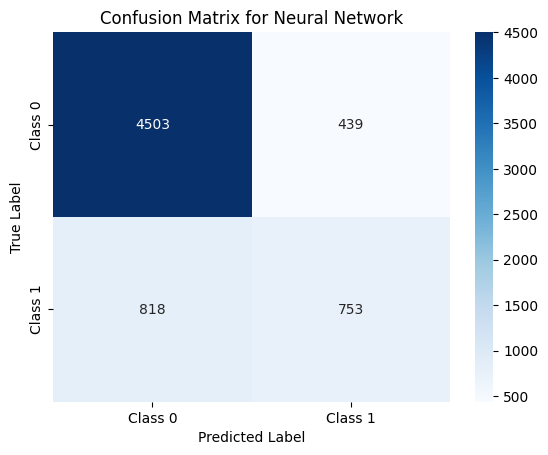

In [110]:
# Función para imprimir la matriz de confusión con etiquetas
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.figure(figsize=(10, 8))
plot_roc_curve(y_test, y_prob_log, 'regression logistica')
plot_roc_curve(y_test, y_prob_rf, 'Random Forest')
plot_roc_curve(y_test, y_prob_svm, 'SVM')
plot_roc_curve(y_test, y_pred_ann, 'Neural Network')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

models = {
    'regression logistica': (y_pred_log, y_prob_log),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'SVM': (y_pred_svm, y_prob_svm),
    'Neural Network': (y_pred_ann, y_prob_ann)
}

for model_name, (y_pred, y_prob) in models.items():
    print(f'\nMetrics for {model_name}')
    print_metrics(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, model_name)

# Pregunta 5: Importancia de las variables

In [106]:
# Importancia de variables para regresión logística
log_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("Logistic Regression Feature Importances:\n", log_importances)

Logistic Regression Feature Importances:
           Feature  Importance
3   education-num    0.870106
0             age    0.642879
5  hours-per-week    0.520915
4      occupation    0.072663
2       education    0.053689
1       workclass    0.009785


In [107]:
# Calcule la importancia de variables para Random Forest

In [108]:
############### código #####################
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importancia para random forest:\n", rf_importances)

Importancia para random forest:
           Feature  Importance
3   education-num    0.392537
0             age    0.309358
5  hours-per-week    0.165785
4      occupation    0.062593
2       education    0.061101
1       workclass    0.008625
